# E5.B - Task

In [334]:
reset -f

In [335]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Definition of variables

In [336]:
F, g, A, L, rho, alpha, E, dT, x, N = sp.symbols('F, g, A, L, rho, alpha, E, dT, x, N', real = 'True')

In [337]:
u = sp.Function('u')
N = sp.Function('N')

## Determine internal force equilibrium

In [338]:
eq = sp.Eq(0, -N(x) + F + rho*A*g*(L-x))
sol = sp.solve(eq, N(x))
N = sol[0]
N

A*L*g*rho - A*g*rho*x + F

## Definition of deformation equation

In [339]:
eq = sp.Eq(sp.Derivative(u(x),x), N/(E*A) + alpha*dT)
eq

Eq(Derivative(u(x), x), alpha*dT + (A*L*g*rho - A*g*rho*x + F)/(A*E))

## Solution of the ODE

In [340]:
sol = sp.dsolve(eq, ics = {u(0):0})
u = sp.simplify(sol.rhs)
sol

Eq(u(x), alpha*dT*x + L*g*rho*x/E - g*rho*x**2/(2*E) + F*x/(A*E))

## Compensate length change of the rod due to temperature

In [341]:
eq1 = sp.Eq(0, u.subs(x,L))
sol = sp.solve(eq1, dT)
dTnew = sp.expand(sol[0])
dTnew

-L*g*rho/(2*E*alpha) - F/(A*E*alpha)

## Deformation

In [342]:
u = sp.simplify(u.subs(dT, dTnew))
display(u)

g*rho*x*(L - x)/(2*E)

## Stress

In [343]:
eq = sp.Eq(dT, dTnew)
sol = sp.solve(eq, F)
Fn = sol[0]
sigma = N.subs(F, Fn) / A
sp.simplify(sigma)

-E*alpha*dT + L*g*rho/2 - g*rho*x

## Plotting

In [344]:
u = u.subs([(F, 10), (g, 9810), (A, 4), (L, 100), (rho, 7.85e-6), (alpha, 12e-6), (E, 210000)])
sigma = sigma.subs([(dT, -1), (g, 9810), (A, 4), (L, 100), (rho, 7.85e-6), (alpha, 12e-6), (E, 210000)])

In [345]:
u_fun = sp.lambdify((x), u, 'numpy')
sigma_fun = sp.lambdify((x), sigma, 'numpy')
s = np.arange(0,101,1)

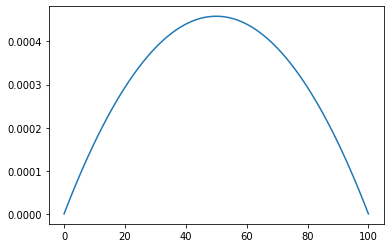

In [346]:
plt.plot(s, u_fun(s))

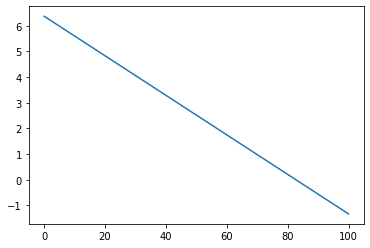

In [347]:
plt.plot(s, sigma_fun(s))